In [72]:
# we import the required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# we import all the datasets and concatenate into one
df = pd.DataFrame()
for root, dir, files in os.walk("data"):
    for file in files:
        sub_df = pd.read_csv(os.path.join(root, file))
        df = pd.concat([df, sub_df])

In [12]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [13]:
df.shape # shape of the final dataset

(420768, 18)

##### **Analysis**

To analyze the pollution, we are going to use the PM2.5 readings. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution.

In [16]:
# we check for nulls
df["PM2.5"].isna().sum()

8739

In [17]:
# we check the descriptive stats
df["PM2.5"].describe()

count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: PM2.5, dtype: float64

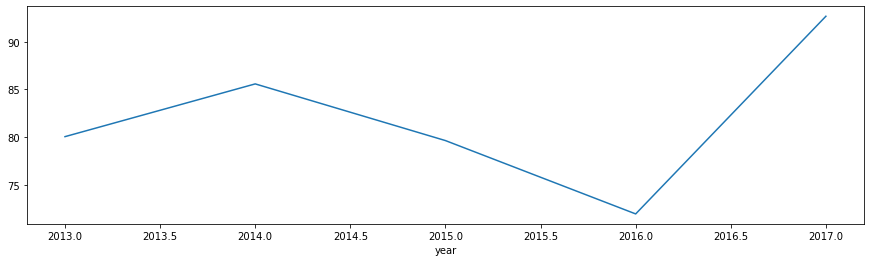

In [31]:
# overall polution trend over the years
df.groupby("year")["PM2.5"].mean().sort_index(ascending=True).plot(figsize=(15,4));

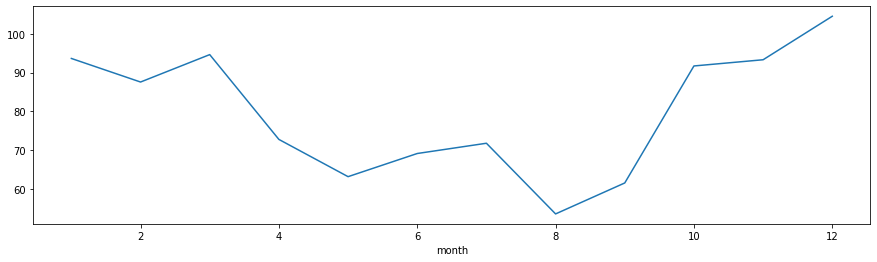

In [35]:
# overall polution trend over the months
df.groupby("month")["PM2.5"].mean().sort_index(ascending=True).plot(figsize=(15,4));

We see that pollution is higher towards the beginning and end of a year.

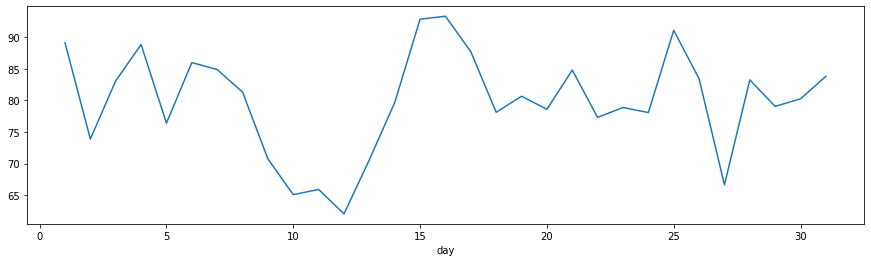

In [36]:
# overall polution trend over the days
df.groupby("day")["PM2.5"].mean().sort_index(ascending=True).plot(figsize=(15,4));

We can see that pollution increased significantly after 2016.

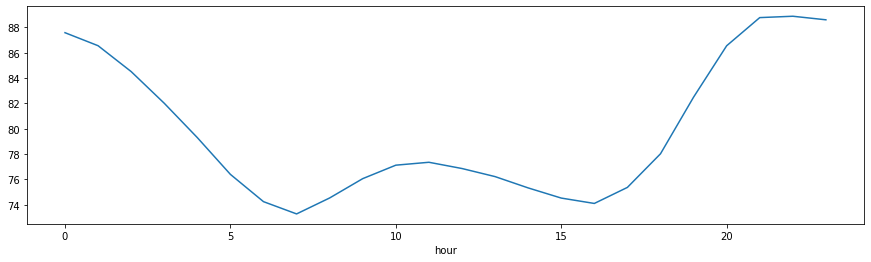

In [33]:
# overall polution trend over the hours of the day
df.groupby("hour")["PM2.5"].mean().sort_index(ascending=True).plot(figsize=(15,4));

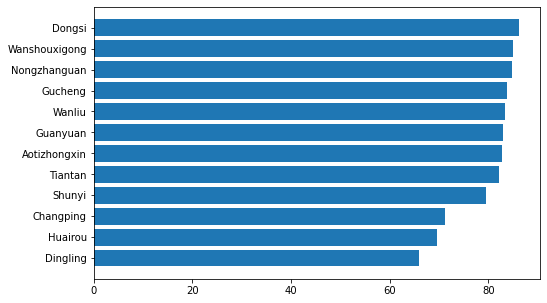

In [50]:
# pollution as per the cities
plt.figure(figsize=(8,5))
plt.barh(df.groupby("station")["PM2.5"].mean().sort_values().index, df.groupby("station")["PM2.5"].mean().sort_values().values);

##### **Questions & Answers**

Q1: Which region of Beijing had the most pollution?

In [23]:
df.groupby("station")["PM2.5"].mean().sort_values(ascending=False)[:1]

station
Dongsi    86.194297
Name: PM2.5, dtype: float64

Ans: Dongsi : 86.19

Q2: Which region of Beijing had the least pollution?

In [24]:
df.groupby("station")["PM2.5"].mean().sort_values(ascending=True)[:1]

station
Dingling    65.989497
Name: PM2.5, dtype: float64

Ans: Dingling: 65.99

Q3: Which year had the highest pollution?

In [26]:
df.groupby("year")["PM2.5"].mean().sort_values(ascending=False)[:1]

year
2017    92.675992
Name: PM2.5, dtype: float64

Ans: 2017: 92.68

Q4: Which year had the lowest pollution?

In [32]:
df.groupby("year")["PM2.5"].mean().sort_values(ascending=True)[:1]

year
2016    71.930151
Name: PM2.5, dtype: float64

Ans: 2016: 71.93

##### **Prediction**

In [66]:
df["datetime_val"] = pd.to_datetime(df[["year", "month", "day", "hour"]]) # we create a datetime column
df["datetime_val"] = pd.to_datetime(df["datetime_val"])

In [67]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime_val
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [68]:
time_series_data = df.groupby("datetime_val")["PM2.5"].mean().sort_index()
time_series_data

datetime_val
2013-03-01 00:00:00     5.666667
2013-03-01 01:00:00     6.833333
2013-03-01 02:00:00     5.666667
2013-03-01 03:00:00     6.000000
2013-03-01 04:00:00     4.833333
                         ...    
2017-02-28 19:00:00    16.083333
2017-02-28 20:00:00    19.000000
2017-02-28 21:00:00    15.666667
2017-02-28 22:00:00    13.666667
2017-02-28 23:00:00    15.000000
Name: PM2.5, Length: 35064, dtype: float64

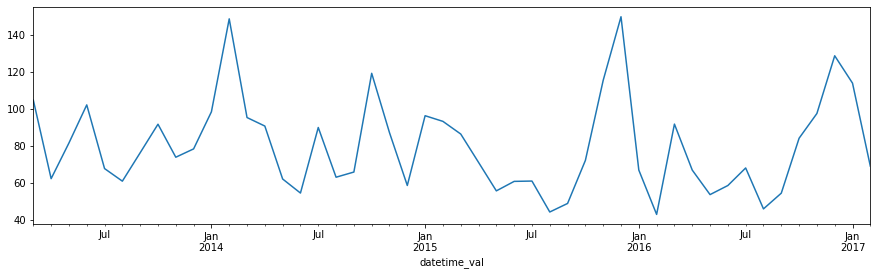

In [89]:
# we resample by month and plot the data
time_series_data.resample("M").mean().plot(figsize=(15,4));

We see that an increased pollution trend is seen towards the year beginning and end.

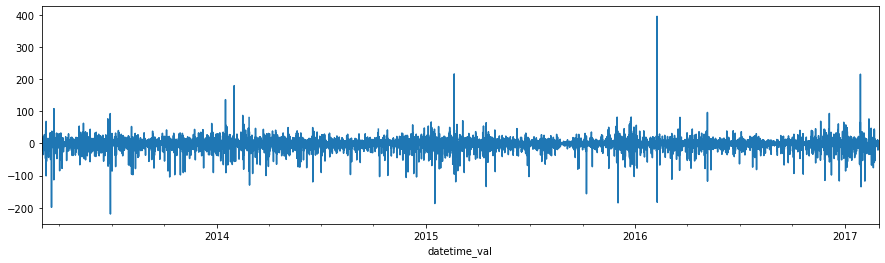

In [86]:
# to understand the variance, we use first order differencing
time_series_data.diff(periods=1).plot(figsize=(15,4));

We see that there is quite some variance on the pollution data. This may be due to taking the mean of several regions.